In [5]:
import cv2
video_capture = cv2.VideoCapture('/Users/aravdhoot/Downloads/OneDrive_2_8-3-2023/masked_videos/SEVERE-20230609T015630Z-001/SEVERE/severe_youtube_23022022_18.mp4')

ret, frame = video_capture.read()
if not ret: print('else')
else: cv2.imwrite('/Users/aravdhoot/Downloads/PD_Test/file.jpg', frame)

In [16]:
import torchvision.models.segmentation as seg
model = seg.deeplabv3_resnet50(pretrained=True, progress=True)
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [26]:
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    transform = T.Compose([
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    input_tensor = transform(image).unsqueeze(0)
    return input_tensor

# Replace 'path/to/your/image.jpg' with the path to your image.
image_path = '/Users/aravdhoot/Downloads/PD_Test/file.jpg'
input_tensor = preprocess_image(image_path)

In [28]:
with torch.no_grad():
    output = model(input_tensor)['out'][0]
    output_predictions = output.argmax(0).cpu().numpy()


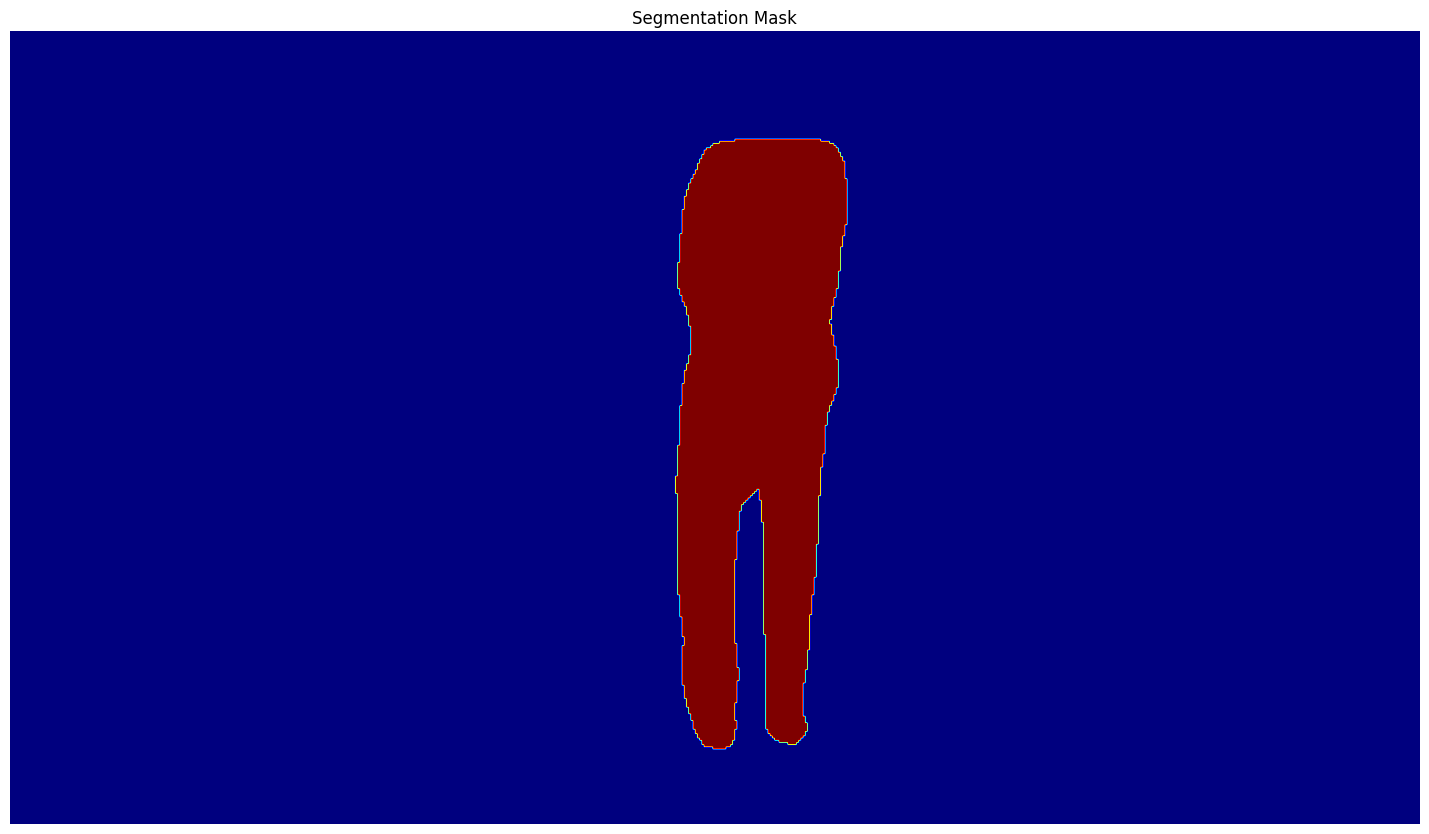

In [35]:
def visualize_segmentation(image_path, output_predictions):
    
    # Show segmentation mask
    plt.figure(figsize=(40, 40))
    plt.subplot(1, 2, 2)
    plt.imshow(output_predictions, cmap='jet')
    plt.axis('off')
    plt.title('Segmentation Mask')
    
    plt.show()

visualize_segmentation(image_path, output_predictions)